# Exercise of the 20th of october 2020

exploring multilayer perceptron

## Imports

In [76]:
import numpy as np
import matplotlib.pyplot as plt

In [77]:
data = np.loadtxt('nonlinear_classification.data')
data[:5]

array([[ 0.488997 ,  0.390712 , -1.       ],
       [ 0.0106694,  0.642974 ,  1.       ],
       [ 0.205201 ,  0.628098 , -1.       ],
       [ 0.100216 ,  0.494993 ,  1.       ],
       [ 0.411485 ,  0.267488 ,  1.       ]])

In [78]:
X = data[:,:2]
Y = data[:, 2]
N, d = X.shape

In [109]:
_lr = 0.05
_nb_hidden_neurons = 15

In [110]:
max_val = 0.1
W_hid = np.random.uniform(-max_val, max_val, (d, _nb_hidden_neurons))
b_hid = np.random.uniform(-max_val, max_val, _nb_hidden_neurons)
W_out = np.random.uniform(-max_val, max_val, _nb_hidden_neurons)
b_out = np.random.uniform(-max_val, max_val, 1)

In [111]:
W_out

array([-0.04663865,  0.04810109, -0.05188963,  0.00998099, -0.05256633,
        0.0714546 , -0.05832133, -0.09136488,  0.08401853,  0.0480075 ,
       -0.02629094,  0.09367497, -0.06967703, -0.03815147, -0.09019917])

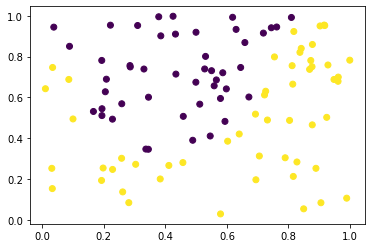

In [112]:
plt.scatter(X[:,0], X[:,1], c=Y)

In [113]:
def logistic(x) :
    return 1.0 / (1.0 + np.exp(-x))

def threshold(x) :
    data = x.copy()
    data [data > 0.] = 1.
    data [data < 0.] = -1.
    return data

def feed_forward(X, W_hid, b_hid, W_out, b_out):
    Y = logistic(np.dot(X, W_hid) + b_hid)
    # Output layer
    O = threshold(np.dot(Y, W_out) + b_out)
    return Y, O

In [145]:
def create_model(input_shape, nb_hidden_layers, output_shape):
    max_val = 0.1
    W_hid = np.random.uniform(-max_val, max_val, (input_shape, nb_hidden_layers))
    b_hid = np.random.uniform(-max_val, max_val, nb_hidden_layers)
    W_out = np.random.uniform(-max_val, max_val, nb_hidden_layers)
    b_out = np.random.uniform(-max_val, max_val, output_shape)
    return W_hid, b_hid, W_out, b_out

In [146]:
def train_model(X, Y, W_hid, b_hid, W_out, b_out, _lr, epochs):
    errors = []
    for epoch in range(epochs):
        nb_errors = 0
        for i in range(X.shape[0]):
            x = X[i,:]
            y_true = Y[i]
            y_pred, o = feed_forward(x, W_hid, b_hid, W_out, b_out)
            if y_true != o:
                nb_errors += 1
            delta_out = (y_true - o)
            delta_hidden = y_pred * (1-y_pred) * delta_out * W_out
            W_out += np.multiply(np.multiply(_lr, y_pred), delta_out)
            b_out += np.multiply(_lr, o)
            for k in range(W_hid.shape[1]):
                W_hid[:,k] += np.multiply(np.multiply(_lr, x), delta_hidden[k])
            b_hid += np.multiply(_lr, y_pred)
        if nb_errors == 0 :
            print("no error")
            break
        else:
            pass
            #print(nb_errors)
        errors.append(nb_errors)
    print(W_hid)
    print(b_hid)
    print(W_out)
    print(b_out)
    return errors

In [151]:
W_hid, b_hid, W_out, b_out = create_model(d, 20, 1)
errors = train_model(X, Y, W_hid.copy(), b_hid.copy(), W_out.copy(), b_out.copy(), _lr, 100)

[[ 0.04172687  0.08018276 -0.0913782  -0.0388465  -0.00790849  0.05237445
  -0.01093632  0.09181927 -0.09186654  0.00070829 -0.04917614 -0.00993152
  -0.07507459 -0.02390469 -0.06571914 -0.01376005  0.05234744  0.05369315
   0.05025285  0.08929944]
 [-0.08948516  0.00587532 -0.05071882 -0.07869848  0.01967705  0.08797999
  -0.10186814 -0.09032906 -0.04720715  0.00605829  0.03816955  0.07254214
   0.0288082  -0.05165425 -0.09249878  0.07389549  0.03180213  0.03268071
  -0.00271199  0.0782183 ]]
[498.75882916 499.12038307 498.75906283 498.81051504 499.09961489
 499.02707724 498.83700556 498.79574199 499.0999009  498.91706284
 499.10403402 499.05846318 498.81422285 498.98338302 498.92315197
 499.10187514 499.21358405 499.0027093  499.01588677 498.90300343]
[-1.56786986 -1.60070747 -1.62299682 -1.43158453 -1.52836261 -1.62283755
 -1.43532004 -1.45340251 -1.4482966  -1.61895294 -1.51634168 -1.47958122
 -1.60847335 -1.5032084  -1.57198991 -1.54795073 -1.61789336 -1.51732534
 -1.61838036 -1.5

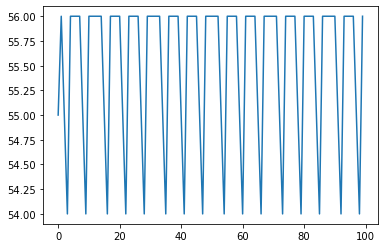

In [152]:
plt.plot(np.arange(len(errors)), errors)